In [1]:
# import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from helpers import *
from implementations import *
import SVM

### Prepare the data ###

In [2]:
x_train, x_test, y_train, train_ids, test_ids = load_csv_data("/home/zewzhang/Course/ML/ML_course/projects/project1/data/dataset_to_release", sub_sample=True)

In [3]:
print(x_train.shape)
print(y_train.shape)

(6563, 321)
(6563,)


In [4]:
x_train_processed = x_train.copy()
x_train_processed = fillna_with_mean(x_train_processed, threshold=0.5)
x_train_processed = standardize(x_train_processed)
x_train_processed = add_bias(x_train_processed)
# add a column of ones
x_train_processed, y_train_processed = data_augmentation(x_train_processed, y_train)
y_train_processed = process_y(y_train_processed)
print(np.isnan(x_train_processed).any())

False


In [5]:
print(x_train_processed.shape)
print(y_train_processed.shape)

(12004, 171)
(12004,)


In [6]:
x_train_processed_orig = x_train.copy()
x_train_processed_orig = fillna_with_mean(x_train_processed_orig, threshold=0.5)
x_train_processed_orig = standardize(x_train_processed_orig)
x_train_processed_orig = add_bias(x_train_processed_orig)
# add a column of ones
y_train_processed_orig = y_train.copy()
y_train_processed_orig = process_y(y_train_processed_orig)
print(np.isnan(x_train_processed_orig).any())

False


In [7]:
print(x_train_processed_orig.shape)
print(y_train_processed_orig.shape)

(6563, 171)
(6563,)


In [8]:
## PCA feature selection ##
pre_train_data = x_train.copy()
pre_train_data = fillna_with_mean(pre_train_data, threshold=0.8)

x_pca, eig_vec, eig_val,weight = pca(pre_train_data, 120)
x_pca = standardize(x_pca)
x_pca = add_bias(x_pca)
x_train_processed_orig_pca = x_pca.copy()
x_pca, _ = data_augmentation(x_pca, y_train)
print(weight)

[ 1.02320911e-01+0.00000000e+00j  4.52116690e-02+0.00000000e+00j
  3.10378066e-02+0.00000000e+00j  2.77883511e-02+0.00000000e+00j
  2.47083161e-02+0.00000000e+00j  2.31533245e-02+0.00000000e+00j
  1.87261273e-02+0.00000000e+00j  1.79955744e-02+0.00000000e+00j
  1.76385082e-02+0.00000000e+00j  1.64007537e-02+0.00000000e+00j
  1.55352736e-02+0.00000000e+00j  1.52578158e-02+0.00000000e+00j
  1.48278350e-02+0.00000000e+00j  1.33899899e-02+0.00000000e+00j
  1.30278016e-02+0.00000000e+00j  1.28294968e-02+0.00000000e+00j
  1.15067859e-02+0.00000000e+00j  1.14056171e-02+0.00000000e+00j
  1.10659812e-02+0.00000000e+00j  1.06258184e-02+0.00000000e+00j
  1.01533474e-02+0.00000000e+00j  9.99904064e-03+0.00000000e+00j
  9.57917881e-03+0.00000000e+00j  9.42733765e-03+0.00000000e+00j
  9.23741586e-03+0.00000000e+00j  8.94190344e-03+0.00000000e+00j
  8.70727214e-03+0.00000000e+00j  8.50229021e-03+0.00000000e+00j
  8.46263196e-03+0.00000000e+00j  8.13635408e-03+0.00000000e+00j
  7.81887856e-03+0.000000

In [9]:
pre_train_data.shape

(6563, 205)

/home/zewzhang/miniconda3/envs/ML/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/zewzhang/miniconda3/envs/ML/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


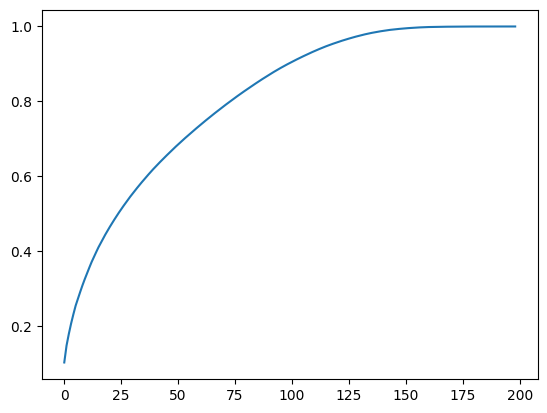

In [10]:
cummulation = np.cumsum(weight)
cummulation
plt.plot(cummulation)

In [11]:
x_pca.shape

(12004, 121)

### Experiment ###

In [12]:
## linear regression using all the features except for those having NaN values over 50% ##

initial_w = np.random.randn(x_train_processed.shape[1]) * 0.01
w, loss = mean_square_error_gd(y_train_processed, x_train_processed, initial_w, max_iters = 100, gamma=0.05)
y_pred = x_train_processed @ w
y_pred_mean = np.mean(y_pred)
predict_acc(x_train_processed_orig, y_train_processed_orig, w, logistic=False, threshold=y_pred_mean)
predict_f1(x_train_processed_orig, y_train_processed_orig, w, logistic=False, threshold=y_pred_mean)

GD iter. 0/99: loss=0.26114112144640456
GD iter. 10/99: loss=0.09846770996058794
GD iter. 20/99: loss=0.08421973069328557
GD iter. 30/99: loss=0.07879501027152785
GD iter. 40/99: loss=0.07650202201430842
GD iter. 50/99: loss=0.0754703883882893
GD iter. 60/99: loss=0.07497638392510107
GD iter. 70/99: loss=0.0747211719204376
GD iter. 80/99: loss=0.07457644702432997
GD iter. 90/99: loss=0.07448535857323069
The Accuracy is: 0.7538
The F1 score is: 0.3668
The precision is: 0.2351
The recall is: 0.8342


In [13]:
x_train_processed.shape

(12004, 171)

In [14]:
# logistic regression using all the features except for those having NaN values over 50% ##
initial_w = np.random.randn(x_train_processed.shape[1]) * 0.01
w, loss = logistic_regression(y_train_processed, x_train_processed, initial_w, max_iters=500, gamma=0.15)
predict_acc(x_train_processed_orig, y_train_processed_orig, w, logistic=True, threshold=0.5)
predict_f1(x_train_processed_orig, y_train_processed_orig, w, logistic=True, threshold=0.5)

GD iter. 0/499: loss=0.699716252812428
GD iter. 1/499: loss=0.6148344262944138
GD iter. 2/499: loss=0.5801103931877526
GD iter. 3/499: loss=0.5626012710679795
GD iter. 4/499: loss=0.552075157718182
GD iter. 5/499: loss=0.5448281822781742
GD iter. 6/499: loss=0.5393116778051298
GD iter. 7/499: loss=0.5348030833062487
GD iter. 8/499: loss=0.530935036919633
GD iter. 9/499: loss=0.5275068872741939
GD iter. 10/499: loss=0.5244018263409661
GD iter. 11/499: loss=0.5215476954615508
GD iter. 12/499: loss=0.5188973328688617
GD iter. 13/499: loss=0.5164182317870387
GD iter. 14/499: loss=0.5140868660631938
GD iter. 15/499: loss=0.511885456624143
GD iter. 16/499: loss=0.5098000614162718
GD iter. 17/499: loss=0.507819406578522
GD iter. 18/499: loss=0.505934145487423
GD iter. 19/499: loss=0.5041363721551989
GD iter. 20/499: loss=0.5024192903528433
GD iter. 21/499: loss=0.5007769809779532
GD iter. 22/499: loss=0.4992042333251003
GD iter. 23/499: loss=0.4976964192136229
GD iter. 24/499: loss=0.49624939

GD iter. 436/499: loss=0.4397028259989028
GD iter. 437/499: loss=0.43969386540259753
GD iter. 438/499: loss=0.4396849493101216
GD iter. 439/499: loss=0.43967607736928405
GD iter. 440/499: loss=0.4396672492312874
GD iter. 441/499: loss=0.43965846455068947
GD iter. 442/499: loss=0.439649722985366
GD iter. 443/499: loss=0.43964102419647344
GD iter. 444/499: loss=0.43963236784841286
GD iter. 445/499: loss=0.43962375360879397
GD iter. 446/499: loss=0.43961518114839837
GD iter. 447/499: loss=0.4396066501411461
GD iter. 448/499: loss=0.43959816026405957
GD iter. 449/499: loss=0.4395897111972302
GD iter. 450/499: loss=0.4395813026237844
GD iter. 451/499: loss=0.4395729342298497
GD iter. 452/499: loss=0.4395646057045223
GD iter. 453/499: loss=0.43955631673983475
GD iter. 454/499: loss=0.4395480670307229
GD iter. 455/499: loss=0.43953985627499537
GD iter. 456/499: loss=0.43953168417330124
GD iter. 457/499: loss=0.43952355042909974
GD iter. 458/499: loss=0.43951545474862924
GD iter. 459/499: loss

In [15]:
# ridge regression using all the features except for those having NaN values over 50% ##
w, loss = ridge_regression(y_train_processed, x_train_processed, lambda_=0.001)
y_pred = y_pred = x_train_processed @ w
y_pred_mean = np.mean(y_pred)
predict_acc(x_train_processed_orig, y_train_processed_orig, w, logistic=False, threshold=y_pred_mean)
predict_f1(x_train_processed_orig, y_train_processed_orig, w, logistic=False, threshold=y_pred_mean)

The Accuracy is: 0.7559
The F1 score is: 0.3673
The precision is: 0.2359
The recall is: 0.8289


In [16]:
## linear regression using PCA feature selection ##

initial_w = np.random.randn(x_pca.shape[1]) * 0.01
w, loss = mean_square_error_gd(y_train_processed, x_pca, initial_w, max_iters = 100, gamma=0.1)
y_pred = x_pca @ w
y_pred_mean = np.mean(y_pred)
predict_acc(x_train_processed_orig_pca, y_train_processed_orig, w, logistic=False, threshold=y_pred_mean)
predict_f1(x_train_processed_orig_pca, y_train_processed_orig, w, logistic=False, threshold=y_pred_mean)

GD iter. 0/99: loss=(0.24739068806990097+0j)
GD iter. 10/99: loss=(0.08067115037262228+0j)
GD iter. 20/99: loss=(0.07583378074376798+0j)
GD iter. 30/99: loss=(0.0753072548380323+0j)
GD iter. 40/99: loss=(0.07521137354935967+0j)
GD iter. 50/99: loss=(0.07518996132930165+0j)
GD iter. 60/99: loss=(0.07518466821017554+0j)
GD iter. 70/99: loss=(0.07518328174521358+0j)
GD iter. 80/99: loss=(0.07518290495897798+0j)
GD iter. 90/99: loss=(0.07518279990942366+0j)
The Accuracy is: 0.7571
The F1 score is: 0.3675
The precision is: 0.2363
The recall is: 0.8253


In [17]:
# logistic regression using pca feature selection #
initial_w = np.random.randn(x_pca.shape[1]) * 0.01
w, loss = logistic_regression(y_train_processed, x_pca, initial_w, max_iters=100, gamma=0.15)
predict_acc(x_train_processed_orig_pca, y_train_processed_orig, w, logistic=True, threshold=0.5)
predict_f1(x_train_processed_orig_pca, y_train_processed_orig, w, logistic=True, threshold=0.5)

GD iter. 0/99: loss=(0.6930176333048947-0j)
GD iter. 1/99: loss=(0.6738601381098865-0j)
GD iter. 2/99: loss=(0.6571834980647537-0j)
GD iter. 3/99: loss=(0.6425976756904533-0j)
GD iter. 4/99: loss=(0.6297708137787879-0j)
GD iter. 5/99: loss=(0.6184251824807079-0j)
GD iter. 6/99: loss=(0.60833058153928-0j)
GD iter. 7/99: loss=(0.5992970855072026-0j)
GD iter. 8/99: loss=(0.5911681649546909-0j)
GD iter. 9/99: loss=(0.5838146376235622-0j)
GD iter. 10/99: loss=(0.5771295705695456-0j)
GD iter. 11/99: loss=(0.5710240886070683-0j)
GD iter. 12/99: loss=(0.5654239763845431-0j)
GD iter. 13/99: loss=(0.5602669445586639-0j)
GD iter. 14/99: loss=(0.5555004374834667-0j)
GD iter. 15/99: loss=(0.5510798759644084-0j)
GD iter. 16/99: loss=(0.5469672467415925-0j)
GD iter. 17/99: loss=(0.5431299672604187-0j)
GD iter. 18/99: loss=(0.5395399688007138-0j)
GD iter. 19/99: loss=(0.5361729529714627-0j)
GD iter. 20/99: loss=(0.5330077861546706-0j)
GD iter. 21/99: loss=(0.5300260040552485-0j)
GD iter. 22/99: loss=(

In [42]:
a = np.unique(x_train[:, 1], return_counts=False)
a

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

### Apply SVM to classification task

In [23]:
w_svm, b_svm = SVM.gradient_descent(x_train_processed_orig_pca[:, 1:], y_train_processed_orig, epochs=500, lr=0.3)

GD iter. 0/499: loss=1.0, w0=168.29999999999998, w1=[1.01122223e-03 2.89055813e-04 8.05426249e-04 ... 3.00000000e-01
 1.57313929e-02 1.01104583e-02]
GD iter. 1/499: loss=0.918402225152949, w0=168.29999999999998, w1=[7.07855563e-04 2.02339069e-04 5.63798374e-04 ... 2.10000000e-01
 1.10119751e-02 7.07732080e-03]
GD iter. 2/499: loss=0.9164226975167781, w0=168.29999999999998, w1=[4.95498894e-04 1.41637348e-04 3.94658862e-04 ... 1.47000000e-01
 7.70838254e-03 4.95412456e-03]
GD iter. 3/499: loss=0.9154527289750543, w0=168.29999999999998, w1=[3.46849226e-04 9.91461439e-05 2.76261203e-04 ... 1.02900000e-01
 5.39586778e-03 3.46788719e-03]
GD iter. 4/499: loss=0.9149774443896096, w0=168.29999999999998, w1=[2.42794458e-04 6.94023008e-05 1.93382842e-04 ... 7.20300000e-02
 3.77710744e-03 2.42752103e-03]
GD iter. 5/499: loss=0.9147445549427417, w0=168.29999999999998, w1=[1.69956121e-04 4.85816105e-05 1.35367990e-04 ... 5.04210000e-02
 2.64397521e-03 1.69926472e-03]
GD iter. 6/499: loss=0.914630439